In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

**Train Data Loading**

In [4]:
df = pd.read_csv('data/train-test/data_sklearn_models.csv')
df.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,1.375097,103.837619,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,1.373922,103.855621,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,1.373552,103.838169,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,1.367761,103.855357,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,1.371626,103.857736,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


**Train Data Overview**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206315 entries, 0 to 206314
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   storey_range                       206315 non-null  int64  
 1   resale_price                       206315 non-null  float64
 2   latitude                           206315 non-null  float64
 3   longitude                          206315 non-null  float64
 4   town_BEDOK                         206315 non-null  int64  
 5   town_BISHAN                        206315 non-null  int64  
 6   town_BUKIT BATOK                   206315 non-null  int64  
 7   town_BUKIT MERAH                   206315 non-null  int64  
 8   town_BUKIT PANJANG                 206315 non-null  int64  
 9   town_BUKIT TIMAH                   206315 non-null  int64  
 10  town_CENTRAL AREA                  206315 non-null  int64  
 11  town_CHOA CHU KANG                 2063

**Data Splitting**

In [6]:
y_values = df['resale_price']
X_values = df.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 49) (41263, 49)
(165052,) (41263,)


In [7]:
X_test.columns

Index(['storey_range', 'latitude', 'longitude', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_model_Apartment',
       'flat_model_DBSS', 'flat_model_Improved', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Model A2',
       'flat_model_New Generation', 'flat_model_Others',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_Simplified', 'flat_model_Standard', 'flat_model_Terrace',
       'flat_model_Type S1', 'flat_model_Type S2', 'floor_area_sqm',
       'rem

**Load 2024 Data for Prediction**

In [8]:
data_2024 = pd.read_csv('data/train-test/2024-data.csv')
data_2024 = data_2024.drop('year', axis=1)
data_2024.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.570716,1.373346,103.836459,0,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,12.683858,1.373401,103.849073,0,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,0,13.161584,1.365266,103.844538,0,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,8,13.384728,1.365266,103.844538,0,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,1,12.747815,1.366048,103.838123,0,0,0,0,0,0,...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [9]:
pred_target = data_2024['resale_price']
pred_set = data_2024.drop('resale_price', axis=1)

**Out-of-bag method**

In [ ]:
rf = RandomForestRegressor(random_state = 42, oob_score=True)
rf.fit(X_train, y_train)

In [ ]:
oob_prediction_test = rf.predict(X_test)
oob_r2 = r2_score(y_test, oob_prediction_test)
oob_rmse = root_mean_squared_error(y_test, oob_prediction_test)
oob_mse = mean_squared_error(y_test, oob_prediction_test)
oob_mae = mean_absolute_error(y_test, oob_prediction_test)
oob_mape = mean_absolute_percentage_error(y_test, oob_prediction_test)
print('Train data R2 score:', oob_r2)
print("Train data Root Mean Squared Error:", oob_rmse)
print("Train data Mean Squared Error:", oob_mse)
print("Train data Mean Absolute Error:", oob_mae)
print("Train data Mean Absolute Percentage Error:", oob_mape)
print('Train data Out-of-bag score:', rf.oob_score_)

Train data R2 score: 0.9632128715316759
Train data Root Mean Squared Error: 0.06302164435547422
Train data Mean Squared Error: 0.003971727657267876
Train data Mean Absolute Error: 0.045790328356110986
Train data Mean Absolute Percentage Error: 0.0035199504994591598
Train data Out-of-bag score: 0.962850256266572


Visualise training predictions against actual values

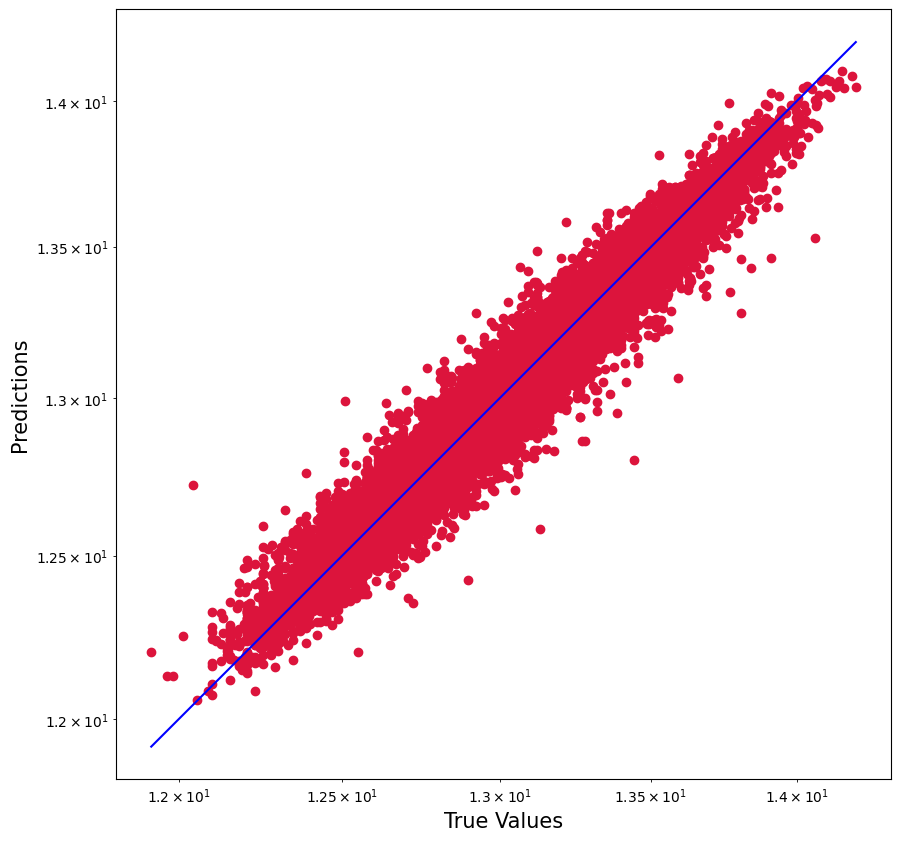

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, oob_prediction_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(oob_prediction_test), max(y_test))
p2 = min(min(oob_prediction_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [13]:
pred_set = pred_set[X_test.columns]

In [14]:
oob_prediction_2024 = rf.predict(pred_set)

In [15]:
oob_pred_r2 = r2_score(pred_target, oob_prediction_2024)
oob_pred_rmse = root_mean_squared_error(pred_target, oob_prediction_2024)
oob_pred_mse = mean_squared_error(pred_target, oob_prediction_2024)
oob_pred_mae = mean_absolute_error(pred_target, oob_prediction_2024)
oob_pred_mape = mean_absolute_percentage_error(pred_target, oob_prediction_2024)
print("Prediction data R2 score:", oob_pred_r2)
print("Prediction data Root Mean Squared Error:", oob_pred_rmse)
print("Prediction data Mean Squared Error:", oob_pred_mse)
print("Prediction data Mean Absolute Error:", oob_pred_mae)
print("Prediction data Mean Absolute Percentage Error:", oob_pred_mape)

Prediction data R2 score: 0.9483626761381727
Prediction data Root Mean Squared Error: 0.06771429310843052
Prediction data Mean Squared Error: 0.004585225491174442
Prediction data Mean Absolute Error: 0.04806734802491651
Prediction data Mean Absolute Percentage Error: 0.003622187666393587


Visualise 2024 predictions against actual values

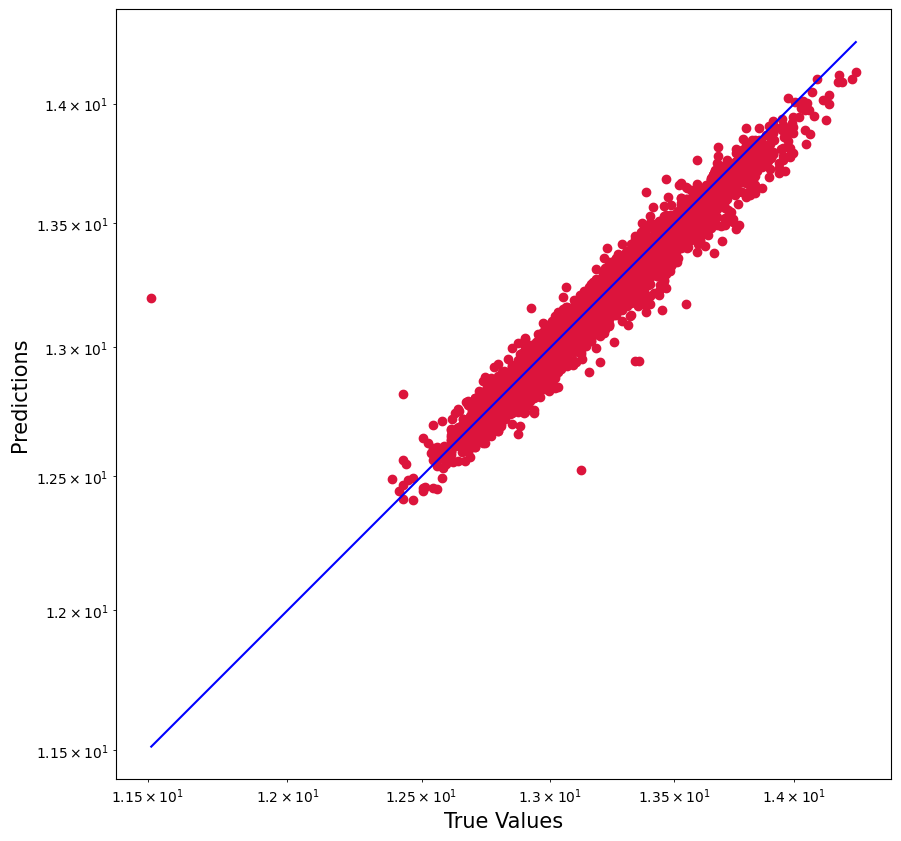

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(pred_target, oob_prediction_2024, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(oob_prediction_2024), max(pred_target))
p2 = min(min(oob_prediction_2024), min(pred_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**K-fold Cross Validation**

In [17]:
param_grid = {
    'max_features': [500],
    'max_depth': [20],
    'min_samples_split': [15],
    'min_samples_leaf': [2]}
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 500, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
rfr.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                             random_state=0),
             param_grid={'max_depth': [20], 'max_features': [500],
                         'min_samples_leaf': [2], 'min_samples_split': [15]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [18]:
print("Best parameters set found on Cross Validation:", rfr.best_params_)
print("Cross Validation MAE score:", abs(rfr.best_score_.round(3)))

Best parameters set found on Cross Validation: {'max_depth': 20, 'max_features': 500, 'min_samples_leaf': 2, 'min_samples_split': 15}
Cross Validation MAE score: 0.051


In [19]:
cv_predicted_test = rfr.predict(X_test)
cv_r2 = r2_score(y_test, cv_predicted_test)
cv_rmse = root_mean_squared_error(y_test, cv_predicted_test)
cv_mse = mean_squared_error(y_test, cv_predicted_test)
cv_mae = mean_absolute_error(y_test, cv_predicted_test)
cv_mape = mean_absolute_percentage_error(y_test, cv_predicted_test)
print('Training data R2 score:', cv_r2)
print("Training data Root Mean Squared Error:", cv_rmse)
print("Training data Mean Squared Error:", cv_mse)
print("Training data Mean Absolute Error:", cv_mae)
print("Training data Mean Absolute Percentage Error:", cv_mape)

Training data R2 score: 0.9561578291862447
Training data Root Mean Squared Error: 0.0687999006300143
Training data Mean Squared Error: 0.004733426326699843
Training data Mean Absolute Error: 0.050368328560807356
Training data Mean Absolute Percentage Error: 0.0038709310746525417


Visualise training data predictions against actual values

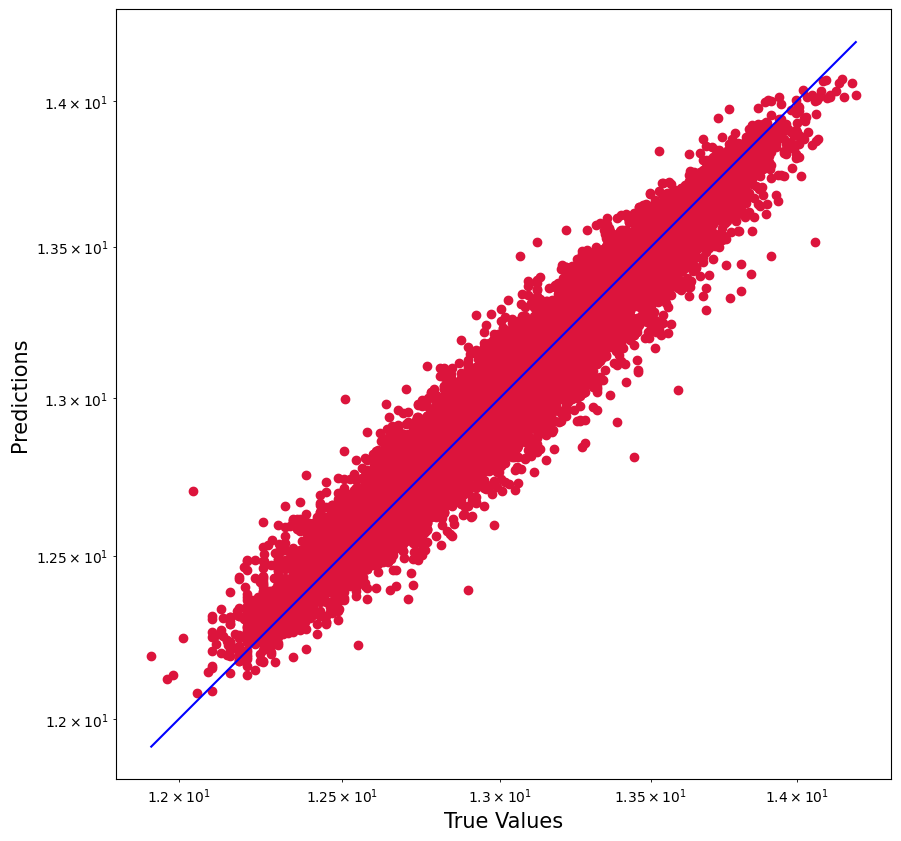

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, cv_predicted_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(cv_predicted_test), max(y_test))
p2 = min(min(cv_predicted_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [21]:
cv_prediction_2024 = rfr.predict(pred_set)

cv_pred_r2 = r2_score(pred_target, cv_prediction_2024)
cv_pred_rmse = root_mean_squared_error(pred_target, cv_prediction_2024)
cv_pred_mse = mean_squared_error(pred_target, cv_prediction_2024)
cv_pred_mae = mean_absolute_error(pred_target, cv_prediction_2024)
cv_pred_mape = mean_absolute_percentage_error(pred_target, cv_prediction_2024)
print("Prediction data R2 score:", cv_pred_r2)
print("Prediction data Root Mean Squared Error:", cv_pred_rmse)
print("Prediction data Mean Squared Error:", cv_pred_mse)
print("Prediction data Mean Absolute Error:", cv_pred_mae)
print("Prediction data Mean Absolute Percentage Error:", cv_pred_mape)

Prediction data R2 score: 0.9436828335621916
Prediction data Root Mean Squared Error: 0.07071619480426039
Prediction data Mean Squared Error: 0.005000780207594104
Prediction data Mean Absolute Error: 0.05064748373528472
Prediction data Mean Absolute Percentage Error: 0.0038132997940614785


Visualise 2024 predictions against actual values

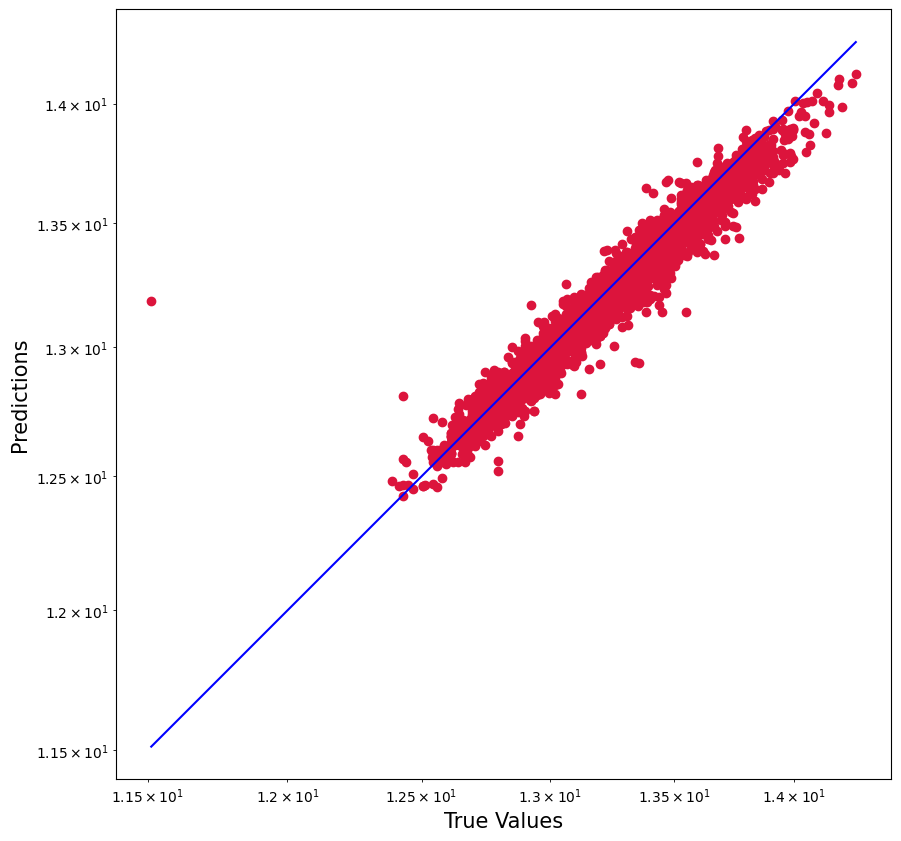

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(pred_target, cv_prediction_2024, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(cv_prediction_2024), max(pred_target))
p2 = min(min(cv_prediction_2024), min(pred_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**General Evaluation of Both Models' Performances**

Both models manage to predict the house prices quite well for both training set and test set. There are few outliers, but most predictions are reasonably close to the true values.

**Comparison of OOB and K-fold Cross Validation**

On Training Data

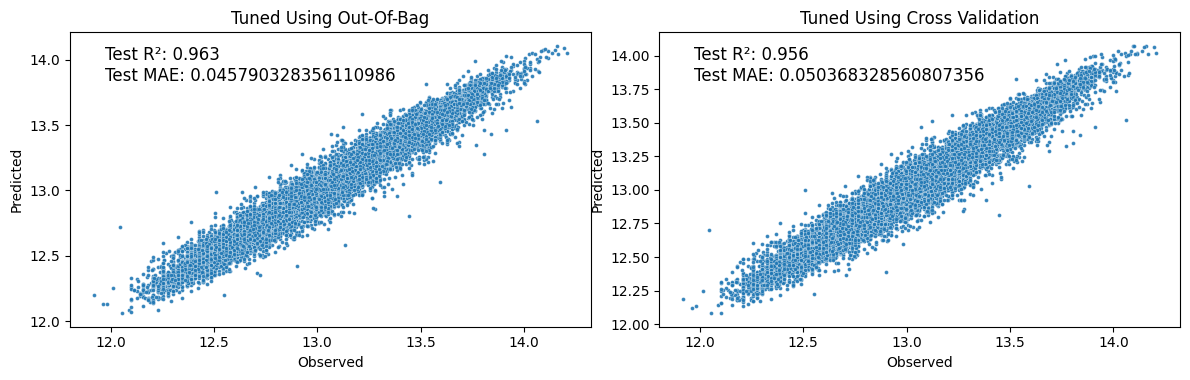

In [ ]:
# scatterplots of y (observed) and y (predicted)

fig = plt.figure(figsize=(13,4))
label_format = '{:,.0f}'

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=y_test, y=oob_prediction_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed')
ax1.set_ylabel('Predicted')
ax1.annotate('Test R\u00b2: ' + str(round(oob_r2,3)) + '\nTest MAE: ' + str(oob_mae), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=y_test, y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')
ax2.annotate('Test R\u00b2: ' + str(round(cv_r2,3)) + '\nTest MAE: ' + str(cv_mae), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

On training data, OOB has slightly better performance than CV in terms of R2 and MAE values, with higher R2 and lower MAE.

On Prediction Data

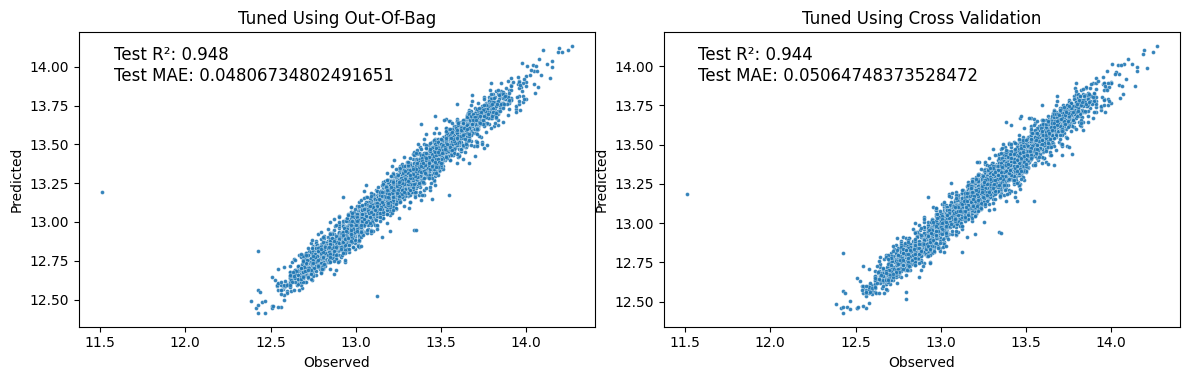

In [24]:
# scatterplots of y (observed) and y (predicted)

fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=pred_target, y=oob_prediction_2024, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed')
ax1.set_ylabel('Predicted')
ax1.annotate('Test R\u00b2: ' + str(round(oob_pred_r2,3)) + '\nTest MAE: ' + str(oob_pred_mae), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=pred_target, y=cv_prediction_2024, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')
ax2.annotate('Test R\u00b2: ' + str(round(cv_pred_r2,3)) + '\nTest MAE: ' + str(cv_pred_mae), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

On prediction data, OOB also performs better than CV for both metrics, with higher R2 and lower MAE values.

**Overall, we can conclude that OOB has better performance than CV for Random Forest Regression model in terms of R2 and MAE values.**

**Feature Importances**

C:\Users\Admin\AppData\Local\Temp\ipykernel_7540\875511087.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


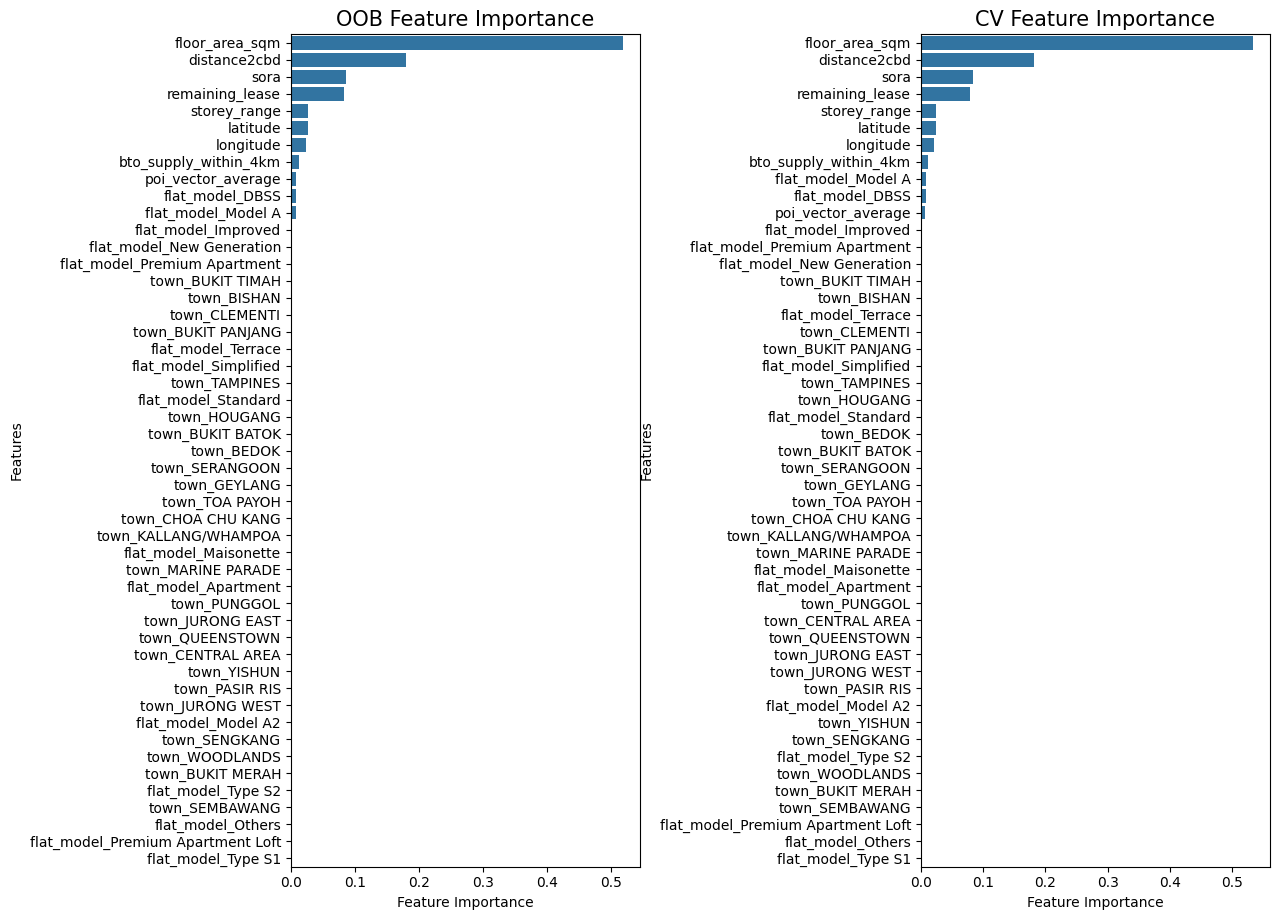

In [25]:
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance', size=15)

ax2 = plt.subplot(122)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance', size=15)

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
fig.show()

Across both models, **floor_area_sqm**, **distance2cbd**, **sora**, **remaining_lease**, **storey_range**, and **bto_supply_within_4km** hold the most importance in predicting house price. In OOB, **poi_vector_average** has greater importance compared to **flat_model_DBSS** and **flat_model_Model A** than in CV. The remaining features are relatively insignificant.